# Homework 6
## Due:  Tuesday, October 10 at 11:59 PM

# Problem 1: Bank Account Revisited

We are going to rewrite the bank account closure problem we had a few assignments ago, only this time developing a formal class for a Bank User and Bank Account to use in our closure (recall previously we just had a nonlocal variable amount that we changed). 

### Some Preliminaries:
First we are going to define two types of bank accounts.  Use the code below to do this:

In [1]:
from enum import Enum
class AccountType(Enum):
    SAVINGS = 1
    CHECKING = 2

An Enum stands for an enumeration, it's a convenient way for you to define lists of things. Typing:

In [2]:
AccountType.SAVINGS

<AccountType.SAVINGS: 1>

returns a Python representation of an enumeration. You can compare these account types:

In [3]:
AccountType.SAVINGS == AccountType.SAVINGS

True

In [4]:
AccountType.SAVINGS == AccountType.CHECKING

False

To get a string representation of an Enum, you can use:

In [5]:
AccountType.SAVINGS.name

'SAVINGS'

### Part 1: Create a BankAccount class with the following specification:

Constructor is `BankAccount(self, owner, accountType)` where `owner` is a string representing the name of the account owner and `accountType` is one of the AccountType enums

Methods `withdraw(self, amount)` and `deposit(self, amount)` to modify the account balance of the account

Override methods `__str__` to write an informative string of the account owner and the type of account, and `__len__` to return the balance of the account

In [6]:
class BankAccount:
    
    def __init__(self, owner, accountType):
        if not accountType in AccountType:
            raise TypeError('Please enter a valid account type.')
        self.owner = owner
        self.accountType = accountType
        self.balance = 0
        
    def withdraw(self, amount):
        if amount > self.balance:
            raise ValueError('Insufficient fund.')
        elif amount < 0:
            raise ValueError('Invalid input.')
        else:
            self.balance -= amount
        return self.balance
    
    def deposit(self, amount):
        if amount < 0:
            raise ValueError('Invalid input.')
        else:
            self.balance += amount
        return self.balance
    
    def __str__(self):
        return 'Account owner: {}, type of account: {}.'.format(self.owner, self.accountType.name)
        
    def __len__(self):
        return self.balance

In [7]:
# Test

ba = BankAccount('Leo', AccountType.CHECKING)
ba.deposit(100)
ba.withdraw(10)
print(str(ba))
print('The balance of account is {}.'.format(len(ba)))

Account owner: Leo, type of account: CHECKING.
The balance of account is 90.


### Part 2:  Write a class BankUser with the following specification:

Constructor `BankUser(self, owner)` where `owner` is the name of the account.

Method `addAccount(self, accountType)` - to start, a user will have no accounts when the BankUser object is created. `addAccount` will add a new account to the user of the `accountType` specified. **Only one savings/checking account per user, return appropriate error otherwise**

Methods `getBalance(self, accountType)`, `deposit(self, accountType, amount)`, and `withdraw(self, accountType, amount)` for a specific AccountType.

Override `__str__` to have an informative summary of user's accounts.

Write some simple tests to make sure this is working. Think of edge scenarios a user might try to do.

In [8]:
class BankUser:
    
    def __init__(self, owner):
        self.owner = owner
        self.accounts = dict()
    
    def addAccount(self, accountType):
        if not accountType in AccountType:
            raise TypeError('Please enter a valid account type.')
        if accountType in self.accounts:
            raise ValueError('You are allowed to own only one savings/checking account.')
        self.accounts[accountType] = BankAccount(self.owner, accountType)
        
    def getBalance(self, accountType):
        if not accountType in self.accounts:
            raise ValueError('You don\'t have the account.')
        return len(self.accounts[accountType])
    
    def deposit(self, accountType, amount):
        if not accountType in self.accounts:
            raise ValueError('You don\'t have the account.')
        self.accounts[accountType].deposit(amount)
        return len(self.accounts[accountType])
    
    def withdraw(self, accountType, amount):
        if not accountType in self.accounts:
            raise ValueError('You don\'t have the account.')
        self.accounts[accountType].withdraw(amount)
        return len(self.accounts[accountType])
    
    def __str__(self):
        return '{} has {} account(s).\n'.format(self.owner, len(self.accounts)) \
    + '\n'.join(['{} account: balance {}.'.format(name, balance) \
                 for name, balance in sorted([(a.name, len(c)) for a, c in self.accounts.items()])])

In [9]:
# Test 1

def test1():
    user1 = BankUser('Jack')
    user1.addAccount(AccountType.CHECKING)
    user1.addAccount(AccountType.SAVINGS)
    user1.deposit(AccountType.CHECKING, 100)
    user1.deposit(AccountType.SAVINGS, 1000)
    user1.withdraw(AccountType.CHECKING, 50)
    assert str(user1) == 'Jack has 2 account(s).\nCHECKING account: balance 50.\nSAVINGS account: balance 1000.'
    
test1()

In [10]:
# Test 2 (unavailable account)

def test2():
    try:
        user1 = BankUser('Mike')
        user1.addAccount(AccountType.CHECKING)
        user1.deposit(AccountType.CHECKING, 100)
        user1.withdraw(AccountType.SAVINGS, 10)
    except ValueError as err:
        assert(type(err) == ValueError)
        
test2()

In [11]:
# Test 3 (Insufficient fund)

def test3():
    try:
        user1 = BankUser('Jim')
        user1.addAccount(AccountType.CHECKING)
        user1.deposit(AccountType.CHECKING, 100)
        user1.withdraw(AccountType.CHECKING, 200)
    except ValueError as err:
        assert(type(err) == ValueError)
        
test3()

### Part 3:  ATM Closure

Finally, we are going to rewrite a closure to use our bank account. We will make use of the [input function](http://anh.cs.luc.edu/python/hands-on/3.1/handsonHtml/io.html) which takes user input to decide what actions to take.

Write a closure called ATMSession(bankUser) which takes in a BankUser object. Return a method called Interface that when called, would provide the following interface:

First screen for user will look like:


**Enter Option:**

**1)Exit**

**2)Create Account**

**3)Check Balance**

**4)Deposit**

**5)Withdraw**


Pressing 1 will exit, any other option will show the options:



**Enter Option:**

**1)Checking**

**2)Savings**


If a deposit or withdraw was chosen, then there must be a third screen:



**Enter Integer Amount, Cannot Be Negative:**

This is to keep the code relatively simple, if you'd like you can also curate the options depending on the BankUser object (for example, if user has no accounts then only show the Create Account option), but this is up to you. In any case, you must handle any input from the user in a reasonable way that an actual bank would be okay with, and give the user a proper response to the action specified.

Upon finishing a transaction or viewing balance, it should go back to the original screen

In [19]:
def ATMSession(bankUser):
    def Interface():
        nonlocal bankUser
        while(True):
            print('Enter Option:\n1)Exit\n2)Create Account\n3)Check Balance\n4)Deposit\n5)Withdraw')
            option = input()
            try:
                option = int(option.strip())
                if option < 0 or option > 5:
                    raise ValueError
            except:
                print('Please enter a valid integer number (from 1 to 5).\n')
                continue
            if 1 == option:
                break
            else:
                print('Enter Option:\n1)Checking\n2)Savings')
                option_type = input()
                try:
                    option_type = int(option_type.strip())
                    if not (1 == option_type or 2 == option_type):
                        raise ValueError
                except:
                    print('Invalid input. Please start over.\n')
                    continue
                if 1 == option_type:
                    accountType = AccountType.CHECKING
                else:
                    accountType = AccountType.SAVINGS
                if 2 == option:
                    try:
                        bankUser.addAccount(accountType)
                        print('{} account has been created successfully.\n'.format(accountType.name))
                        continue
                    except:
                        print('New account setup failed. You\'ve already had a {} account.\n'.format(accountType.name))
                        continue
                else:
                    try:
                        balance = bankUser.getBalance(accountType)
                    except:
                        print('{} account does not exist.\n'.format(accountType.name))
                        continue
                    if 3 == option:
                        print('{} account balance: {}\n'.format(accountType.name, balance))
                        continue
                    else:
                        amount = input('Enter Integer Amount, Cannot Be Negative:')
                        try:
                            amount = int(amount.strip())
                            if amount < 0:
                                raise ValueError
                        except:
                            print('Invalid amount. Please start over.\n')
                            continue
                        if 4 == option:
                            bankUser.deposit(accountType, amount)
                            print('{} has been deposited into {} account. New balance: {}\n'.\
                                  format(amount, accountType.name, bankUser.getBalance(accountType)))
                            continue
                        elif 5 == option:
                            try:
                                bankUser.withdraw(accountType, amount)
                                print('{} has been withdrawn from {} account. New balance: {}\n'.\
                                      format(amount, accountType.name, bankUser.getBalance(accountType)))
                                continue
                            except:
                                print('Insufficient fund.\n')
                                continue
    return Interface

In [22]:
# Test

user1 = BankUser('Jim')
ATMSession(user1)()

Enter Option:
1)Exit
2)Create Account
3)Check Balance
4)Deposit
5)Withdraw
5
Enter Option:
1)Checking
2)Savings
1
CHECKING account does not exist.

Enter Option:
1)Exit
2)Create Account
3)Check Balance
4)Deposit
5)Withdraw
2
Enter Option:
1)Checking
2)Savings
1
CHECKING account has been created successfully.

Enter Option:
1)Exit
2)Create Account
3)Check Balance
4)Deposit
5)Withdraw
2
Enter Option:
1)Checking
2)Savings
1
New account setup failed. You've already had a CHECKING account.

Enter Option:
1)Exit
2)Create Account
3)Check Balance
4)Deposit
5)Withdraw
3
Enter Option:
1)Checking
2)Savings
1
CHECKING account balance: 0

Enter Option:
1)Exit
2)Create Account
3)Check Balance
4)Deposit
5)Withdraw
4
Enter Option:
1)Checking
2)Savings
1
Enter Integer Amount, Cannot Be Negative:1100
1100 has been deposited into CHECKING account. New balance: 1100

Enter Option:
1)Exit
2)Create Account
3)Check Balance
4)Deposit
5)Withdraw
5
Enter Option:
1)Checking
2)Savings
1
Enter Integer Amount, Cann

In [23]:
print(str(user1))

Jim has 2 account(s).
CHECKING account: balance 600.
SAVINGS account: balance 1190.


### Part 4:  Put everything in a module Bank.py

We will be grading this problem with a test suite. Put the enum, classes, and closure in a single file named Bank.py. It is very important that the class and method specifications we provided are used (with the same capitalization), otherwise you will receive no credit.

In [24]:
%%file Bank.py

from enum import Enum
class AccountType(Enum):
    SAVINGS = 1
    CHECKING = 2
    
class BankAccount:
    
    def __init__(self, owner, accountType):
        if not accountType in AccountType:
            raise TypeError('Please enter a valid account type.')
        self.owner = owner
        self.accountType = accountType
        self.balance = 0
        
    def withdraw(self, amount):
        if amount > self.balance:
            raise ValueError('Insufficient fund.')
        elif amount < 0:
            raise ValueError('Invalid input.')
        else:
            self.balance -= amount
        return self.balance
    
    def deposit(self, amount):
        if amount < 0:
            raise ValueError('Invalid input.')
        else:
            self.balance += amount
        return self.balance
    
    def __str__(self):
        return 'Account owner: {}, type of account: {}.'.format(self.owner, self.accountType.name)
        
    def __len__(self):
        return self.balance
    
class BankUser:
    
    def __init__(self, owner):
        self.owner = owner
        self.accounts = dict()
    
    def addAccount(self, accountType):
        if not accountType in AccountType:
            raise TypeError('Please enter a valid account type.')
        if accountType in self.accounts:
            raise ValueError('You are allowed to own only one savings/checking account.')
        self.accounts[accountType] = BankAccount(self.owner, accountType)
        
    def getBalance(self, accountType):
        if not accountType in self.accounts:
            raise ValueError('You don\'t have the account.')
        return len(self.accounts[accountType])
    
    def deposit(self, accountType, amount):
        if not accountType in self.accounts:
            raise ValueError('You don\'t have the account.')
        self.accounts[accountType].deposit(amount)
        return len(self.accounts[accountType])
    
    def withdraw(self, accountType, amount):
        if not accountType in self.accounts:
            raise ValueError('You don\'t have the account.')
        self.accounts[accountType].withdraw(amount)
        return len(self.accounts[accountType])
    
    def __str__(self):
        return '{} has {} account(s).\n'.format(self.owner, len(self.accounts)) \
    + '\n'.join(['{} account: balance {}.'.format(name, balance) \
                 for name, balance in sorted([(a.name, len(c)) for a, c in self.accounts.items()])])
    
def ATMSession(bankUser):
    def Interface():
        nonlocal bankUser
        while(True):
            print('Enter Option:\n1)Exit\n2)Create Account\n3)Check Balance\n4)Deposit\n5)Withdraw')
            option = input()
            try:
                option = int(option.strip())
                if option < 0 or option > 5:
                    raise ValueError
            except:
                print('Please enter a valid integer number (from 1 to 5).\n')
                continue
            if 1 == option:
                break
            else:
                print('Enter Option:\n1)Checking\n2)Savings')
                option_type = input()
                try:
                    option_type = int(option_type.strip())
                    if not (1 == option_type or 2 == option_type):
                        raise ValueError
                except:
                    print('Invalid input. Please start over.\n')
                    continue
                if 1 == option_type:
                    accountType = AccountType.CHECKING
                else:
                    accountType = AccountType.SAVINGS
                if 2 == option:
                    try:
                        bankUser.addAccount(accountType)
                        print('{} account has been created successfully.\n'.format(accountType.name))
                        continue
                    except:
                        print('New account setup failed. You\'ve already had a {} account.\n'.format(accountType.name))
                        continue
                else:
                    try:
                        balance = bankUser.getBalance(accountType)
                    except:
                        print('{} account does not exist.\n'.format(accountType.name))
                        continue
                    if 3 == option:
                        print('{} account balance: {}\n'.format(accountType.name, balance))
                        continue
                    else:
                        amount = input('Enter Integer Amount, Cannot Be Negative:')
                        try:
                            amount = int(amount.strip())
                            if amount < 0:
                                raise ValueError
                        except:
                            print('Invalid amount. Please start over.\n')
                            continue
                        if 4 == option:
                            bankUser.deposit(accountType, amount)
                            print('{} has been deposited into {} account. New balance: {}\n'.\
                                  format(amount, accountType.name, bankUser.getBalance(accountType)))
                            continue
                        elif 5 == option:
                            try:
                                bankUser.withdraw(accountType, amount)
                                print('{} has been withdrawn from {} account. New balance: {}\n'.\
                                      format(amount, accountType.name, bankUser.getBalance(accountType)))
                                continue
                            except:
                                print('Insufficient fund.\n')
                                continue
    return Interface

Writing Bank.py


In [1]:
# test

import Bank

user1 = Bank.BankUser('Jim')
Bank.ATMSession(user1)()

Enter Option:
1)Exit
2)Create Account
3)Check Balance
4)Deposit
5)Withdraw
2
Enter Option:
1)Checking
2)Savings
1
CHECKING account has been created successfully.

Enter Option:
1)Exit
2)Create Account
3)Check Balance
4)Deposit
5)Withdraw
2
Enter Option:
1)Checking
2)Savings
2
SAVINGS account has been created successfully.

Enter Option:
1)Exit
2)Create Account
3)Check Balance
4)Deposit
5)Withdraw
4
Enter Option:
1)Checking
2)Savings
1
Enter Integer Amount, Cannot Be Negative:10000
10000 has been deposited into CHECKING account. New balance: 10000

Enter Option:
1)Exit
2)Create Account
3)Check Balance
4)Deposit
5)Withdraw
4
Enter Option:
1)Checking
2)Savings
2
Enter Integer Amount, Cannot Be Negative:100000
100000 has been deposited into SAVINGS account. New balance: 100000

Enter Option:
1)Exit
2)Create Account
3)Check Balance
4)Deposit
5)Withdraw
5
Enter Option:
1)Checking
2)Savings
1
Enter Integer Amount, Cannot Be Negative:10
10 has been withdrawn from CHECKING account. New balance:

In [2]:
print(str(user1))

Jim has 2 account(s).
CHECKING account: balance 9990.
SAVINGS account: balance 99000.


---

## Problem 2:  Linear Regression Class

Let's say you want to create Python classes for three related types of linear regression: Ordinary Least Squares Linear Regression, Ridge Regression, and Lasso Regression. 

Consider the multivariate linear model:

$$y = X\beta + \epsilon$$

where $y$ is a length $n$ vector, $X$ is an $m \times p$ matrix, and $\beta$
is a $p$ length vector of coefficients.

#### Ordinary Least Squares Linear Regression

[OLS Regression](https://en.wikipedia.org/wiki/Ordinary_least_squares) seeks to minimize the following cost function:

$$\|y - \beta\mathbf {X}\|^{2}$$

The best fit coefficients can be obtained by:

$$\hat{\beta} = (X^T X)^{-1}X^Ty$$

where $X^T$ is the transpose of the matrix $X$ and $X^{-1}$ is the inverse of the matrix $X$.

#### Ridge Regression

[Ridge Regression](https://en.wikipedia.org/wiki/Tikhonov_regularization) introduces an L2 regularization term to the cost function:

$$\|y - \beta\mathbf {X}\|^{2}+\|\Gamma \mathbf {x} \|^{2}$$

Where $\Gamma = \alpha I$ for some constant $\alpha$ and the identity matrix $I$.

The best fit coefficients can be obtained by:
$$\hat{\beta} = (X^T X+\Gamma^T\Gamma)^{-1}X^Ty$$

#### Lasso Regression

[Lasso Regression](https://en.wikipedia.org/wiki/Lasso_%28statistics%29) introduces an L1 regularization term and restricts the total number of predictor variables in the model.
The following cost function:
$${\displaystyle \min _{\beta _{0},\beta }\left\{{\frac {1}{m}}\left\|y-\beta _{0}-X\beta \right\|_{2}^{2}\right\}{\text{ subject to }}\|\beta \|_{1}\leq \alpha.}$$

does not have a nice closed form solution. For the sake of this exercise, you may use the [sklearn.linear_model.Lasso](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) class, which uses a coordinate descent algorithm to find the best fit. You should only use the class in the fit() method of this exercise (ie. do not re-use the sklearn for other methods in your class).

#### $R^2$ score

The $R^2$ score is defined as:
$${R^{2} = {1-{SS_E \over SS_T}}}$$

Where:

$$SS_T=\sum_i (y_i-\bar{y})^2, SS_R=\sum_i (\hat{y_i}-\bar{y})^2, SS_E=\sum_i (y_i - \hat{y_i})^2$$

where  ${y_i}$ are the original data values, $\hat{y_i}$ are the predicted values, and $\bar{y_i}$ is the mean of the original data values.

### Part 1:  Base Class
Write a class called `Regression` with the following methods:

$fit(X, y)$: Fits linear model to $X$ and $y$.

$get\_params()$: Returns $\hat{\beta}$ for the fitted model. The parameters should be stored in a dictionary.

$predict(X)$: Predict new values with the fitted model given $X$.

$score(X, y)$: Returns $R^2$ value of the fitted model.

$set\_params()$: Manually set the parameters of the linear model.

This parent class should throw a `NotImplementedError` for methods that are intended to be implemented by subclasses.

In [1]:
import numpy as np

class Regression:
    
    def __init__(self, alpha=0.1):
        self.alpha = alpha
        
    def fit(self, X, y):
        raise NotImplementedError
    
    def get_params(self):
        return {'beta'+str(i):b for i, b in enumerate(self.beta)}
        
    def predict(self, X):
        y_pred = np.dot(X, self.beta)
        return y_pred
    
    def score(self, X, y):
        y_pred = self.predict(X)
        r2 = 1 - np.sum(np.square(y-y_pred)) / np.sum(np.square(y-np.mean(y)))
        return r2
    
    def set_params(self, **arg):
        if 'beta' in arg:
            self.beta = arg['beta']
        if 'alpha' in arg:
            self.alpha = arg['alpha']
        return self

### Part 2: OLS Linear Regression

Write a class called `OLSRegression` that implements the OLS Regression model described above and inherits the `Regression` class.

In [2]:
class OLS(Regression):
        
    def fit(self, X, y):
        self.beta = np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(y)
        return self
    
    def __str__(self):
        return 'OLS Linear Regression'

### Part 3: Ridge Regression

Write a class called `RidgeRegression` that implements Ridge Regression and inherits the `OLSRegression` class.

In [3]:
class Ridge(Regression):
    
    def fit(self, X, y):
        self.beta = np.linalg.pinv(X.T.dot(X) + self.alpha*self.alpha*np.eye(X.shape[1])).dot(X.T).dot(y)
        return self
    
    def __str__(self):
        return 'Ridge Regression'

### Part 3: Lasso Regression

Write a class called `LassoRegression` that implements Lasso Regression and inherits the `OLSRegression` class. You should only use Lasso(), Lasso.fit(), Lasso.coef_, and Lasso._intercept from the `sklearn.linear_model.Lasso` class.

In [4]:
class Lasso(Regression):
    
    def fit(self, X, y):
        
        # assume constant term (if required) has been added to X
        
        from sklearn.linear_model import Lasso
        self.beta = Lasso(alpha=self.alpha, fit_intercept=False).fit(X, y).coef_
        return self
    
    def __str__(self):
        return 'Lasso Regression'

### Part 4: Model Scoring
You will use the [Boston dataset](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html) for this part.

Instantiate each of the three models above.  Using a for loop, fit (on the training data) and score (on the testing data) each model on the Boston dataset.  

Print out the $R^2$ value for each model and the parameters for the best model using the `get_params()` method. Use an $\alpha$ value of 0.1.

**Hint:**  You can consider using the `sklearn.model_selection.train_test_split` method to create the training and test datasets.

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
# load Boston dataset

from sklearn.datasets import load_boston
from sklearn.cross_validation import train_test_split

X, y = load_boston(return_X_y=True)

# Add constant term to X
X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

/Users/wyssuser/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
models = [OLS(), Ridge(), Lasso()]
models = [model.fit(X_train, y_train) for model in models]
test_scores = [model.score(X_test, y_test) for model in models]
for i, model in enumerate(models):
    print('The test R^2 for {} is {}.'.format(str(model), test_scores[i]))
print()
best_model = models[np.argmax(test_scores)]
print('The best model according to the score on the test data is {}.'.format(str(best_model)))
print('The parameters for the best model ({}) are'.format(str(best_model)))
params = best_model.get_params()
param_names = ['beta'+str(i) for i in range(len(params))]
print('\n'.join(['{}: {}'.format(name, params[name]) for name in param_names]))

The test R^2 for OLS Linear Regression is 0.7312661988225335.
The test R^2 for Ridge Regression is 0.7312502825396794.
The test R^2 for Lasso Regression is 0.7083167898773675.

The best model according to the score on the test data is OLS Linear Regression.
The parameters for the best model (OLS Linear Regression) are
beta0: 37.6429148290392
beta1: -0.15386648670172073
beta2: 0.057685994375377934
beta3: -0.007403126408911869
beta4: 2.491429964600226
beta5: -14.96114472446769
beta6: 3.5357464689075755
beta7: 0.00242793305524424
beta8: -1.588549937599424
beta9: 0.3655160054654222
beta10: -0.014822706478432991
beta11: -0.8911097292170942
beta12: 0.00738611715452874
beta13: -0.5583304654936978


### Part 5: Visualize Model Performance

We can evaluate how the models perform for various values of $\alpha$. Calculate the $R^2$ scores for each model for  $\alpha \in [0.05, 1]$ and plot the three lines on the same graph. To change the parameters, use the `set_params()` method. Be sure to label each line and add axis labels.

In [8]:
alphas = np.arange(0.05, 1.05, 0.05)
ols_scores = [OLS().set_params(alpha=alpha).fit(X_train, y_train).score(X_test, y_test) for alpha in alphas]
ridge_scores = [Ridge().set_params(alpha=alpha).fit(X_train, y_train).score(X_test, y_test) for alpha in alphas]
lasso_scores = [Lasso().set_params(alpha=alpha).fit(X_train, y_train).score(X_test, y_test) for alpha in alphas]

In [9]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('talk')

%matplotlib inline

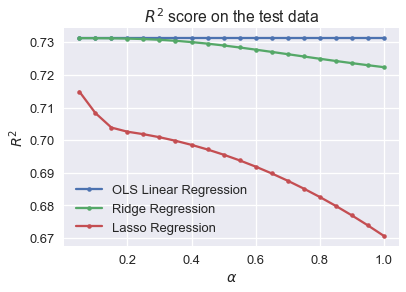

In [10]:
plt.plot(alphas, ols_scores, '.-', label=str(models[0]));
plt.plot(alphas, ridge_scores, '.-', label=str(models[1]));
plt.plot(alphas, lasso_scores, '.-', label=str(models[2]));
plt.legend();
plt.xlabel(r'$\alpha$');
plt.ylabel(r'$R^2$');
plt.title(r'$R^2$ score on the test data');